# Import important libraries
The main libraries we'll be using are :
* scikit-learn -> Using `LinearRegression` Pre-Built models
* matplotlib -> Visualizing our data
* numpy -> Doing hard-math by computer
* pandas -> For cleaning data and understaning how the data works

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Visualizing our data and understanding it.

In [2]:
df = pd.read_csv("Student_Performance.csv")
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Task 1 : Clean and process the data (handle duplicates and missing values, transform categorical columns to numerical values)

In our dataset,  the column named `Extracurricular Activities` is a Binary-Categorical-Value consisting of two values of **Yes** and **No**.

What should change them to numerical values so our computer can work with it.

```
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1, "No":0})
```

In [3]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1, "No":0})

df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## 1.0 Check for Null Values in the dataset

In [4]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


The Data consists of zero Null data .

** Thats some CLEAN Data! **

## 2. Preparing our data for training

1. Removing the column named `Performance Index` and putting it inside the `y` Variable.
2. Converting our X data and our y data into numpy arrays using `df.to_numpy()`

In [5]:
# Removing the y column from the dataset
y = df["Performance Index"]
df = df.drop("Performance Index", axis=1)
y.shape, df.shape

((10000,), (10000, 5))

In [6]:
# Turn df and y into tensors
X = df.to_numpy()
y = y.to_numpy()

# Check for shapes to see if they match
X.shape, y.shape

((10000, 5), (10000,))

## 3. Visualizing our data to see how relavent is our columns to each other

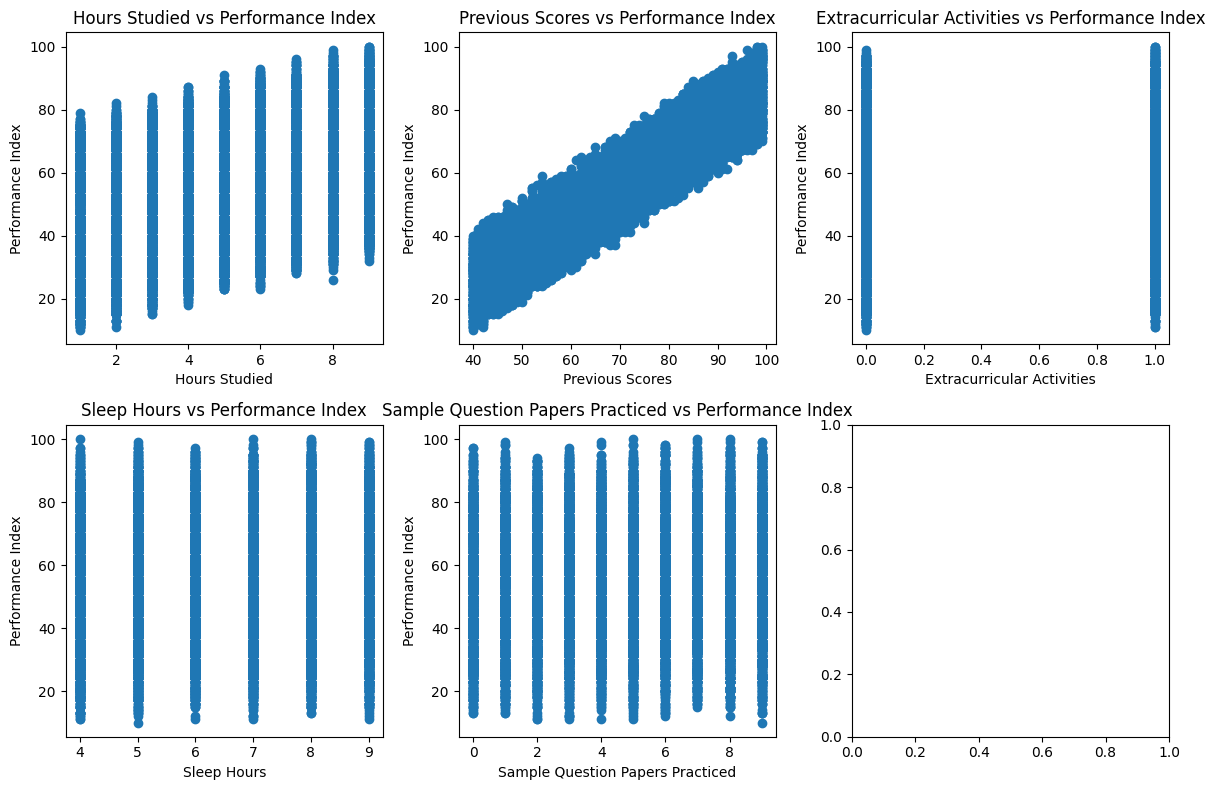

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8)) # Increased figsize for better visibility

# Plot 1: Hours Studied vs Performance Index
axs[0, 0].scatter(df["Hours Studied"], y)
axs[0, 0].set_xlabel("Hours Studied")
axs[0, 0].set_ylabel("Performance Index")
axs[0, 0].set_title("Hours Studied vs Performance Index")

# Plot 2: Previous Scores vs Performance Index
axs[0, 1].scatter(df["Previous Scores"], y)
axs[0, 1].set_xlabel("Previous Scores")
axs[0, 1].set_ylabel("Performance Index")
axs[0, 1].set_title("Previous Scores vs Performance Index")

# Plot 3: Extracurricular Activities vs Performance Index
axs[0, 2].scatter(df["Extracurricular Activities"], y)
axs[0, 2].set_xlabel("Extracurricular Activities")
axs[0, 2].set_ylabel("Performance Index")
axs[0, 2].set_title("Extracurricular Activities vs Performance Index")

# Plot 4: Sleep Hours vs Performance Index
axs[1, 0].scatter(df["Sleep Hours"], y) # Changed to axs[1, 0]
axs[1, 0].set_xlabel("Sleep Hours")
axs[1, 0].set_ylabel("Performance Index")
axs[1, 0].set_title("Sleep Hours vs Performance Index")

# Plot 5: Sample Question Papers Practiced vs Performance Index
axs[1, 1].scatter(df["Sample Question Papers Practiced"], y) # Changed to axs[1, 1]
axs[1, 1].set_xlabel("Sample Question Papers Practiced")
axs[1, 1].set_ylabel("Performance Index")
axs[1, 1].set_title("Sample Question Papers Practiced vs Performance Index")

plt.tight_layout()
plt.show()

## 4. Splitting our data into Train and Test sets (80%, 20%)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Check The Shape of our train test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

## 4.1 Choosing our model and training the model

Since our problem is a Linear Regression problem, we willl be using the `sklearn.linear_model.LinearRegression()` Pre-Built Model.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4.2 Viewing the accuracy of our model using `R2_Score` and `Mean_Squared_Error`

In [15]:
y_pred = model.predict(X_test)

# Get mse and r2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the scores
print(f"Mean Squared Error: {mse:.3f}")
print(f"R2 Score: {r2}")


# Saving y_pred into csv
df_pred = pd.DataFrame(y_pred)
df_pred.to_csv("my_submission.csv")

Mean Squared Error: 4.083
R2 Score: 0.9889832909573145


## 5. Visualizing our test_pred with the actual answers

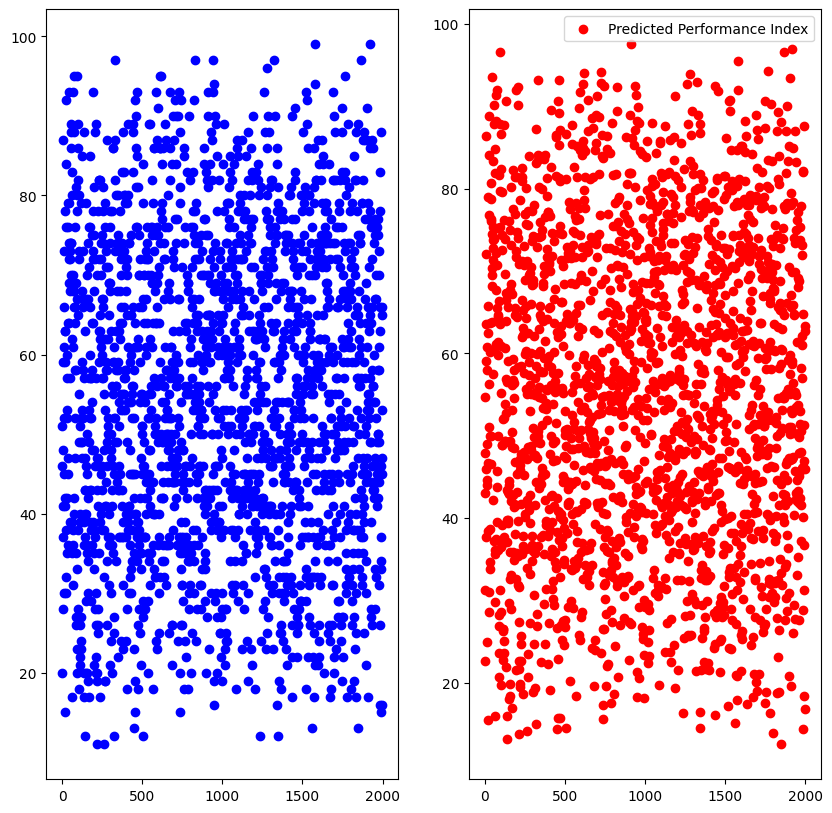

In [12]:
X_range = np.arange(len(y_test))
fig, axs = plt.subplots(1, 2,figsize=(10, 10)) # Corrected the assignment here
axs[0].scatter(X_range, y_test, color="blue", label="Actual Performance Index") # Changed indexing to axs[0]
axs[1].scatter(X_range, y_pred, color="red", label="Predicted Performance Index") # Changed indexing to axs[1]
plt.legend()
plt.show()

## Extra:: Using another model to see if it works better

In [13]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred2 = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

# Print the scores
print(f"Mean Squared Error: {mse:.3f}")
print(f"R2 Score: {r2}")

Mean Squared Error: 8.293
R2 Score: 0.9776205259144839


This model isn`t good because it has a lower R2_Score and a higher MSE.